In [1]:
import pygame as pygame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

pygame 2.0.0 (SDL 2.0.12, python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


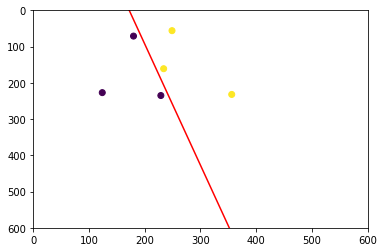

In [ ]:
coords_x = []
coords_y = []
coords = []
clust = []
    
pygame.init()
sc = pygame.display.set_mode((600, 400))
sc.fill((255, 255, 255))
pygame.display.update()
     
clock = pygame.time.Clock() 
FPS = 60 

flag = True
while flag:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            flag = False
        if i.type == pygame.MOUSEBUTTONDOWN:
            if i.button == 1:
                pygame.draw.circle(sc, (255, 255, 50), i.pos, 10)
                pygame.display.update()
                clust.append(0)
            elif i.button == 3:
                pygame.draw.circle(sc, (0, 255, 255), i.pos, 10)
                pygame.display.update()
                clust.append(1)
            coords_x.append(i.pos[0])
            coords_y.append(i.pos[1])
            coords.append(i.pos)
        if i.type == pygame.KEYDOWN:
            if i.key == pygame.K_RIGHT:
                model = svm.SVC(kernel='linear', C=1.0)
                X = np.array(coords)
                Y = np.array(clust)
                model.fit(X, Y)
                m = model.coef0
                w = model.coef_[0]
                n = -w[0] / w[1]
                xx = np.linspace(100, 1000, 1000)
                yy = n * xx - (model.intercept_[0]) / w[1]
                pygame.draw.line(sc,(0, 255, 255),(xx[0], yy[0]),(xx[-1], yy[-1]),2)
                pygame.display.update()
                plt.axis([0.0, 600.0, 600.0, 0.0])
                plt.plot(xx, yy, c='r')
                plt.scatter(X[:, 0], X[:, 1], c=Y)
                plt.show()
    clock.tick(FPS)